# Processed Data Analysis
 
This notebook analyzes the processed climate dataset. It performs error checking, displays summary statistics, and generates visualizations that can be presented in your thesis.
 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed dataset
df = pd.read_csv('../data/processed/climate_data.csv')
train_df = pd.read_csv('../data/processed/snippet/train_climate_data.csv')
val_df = pd.read_csv('../data/processed/snippet/val_climate_data.csv')
test_df = pd.read_csv('../data/processed/snippet/test_climate_data.csv')

print('Data shape:', df.shape)
print('Columns:', df.columns.tolist())
print('Head of dataset:')
print(df.head())

Data shape: (1642679, 8)
Columns: ['time', 'latitude', 'longitude', 'group_id', 't2m', 'tp', 'd2m', 'time_idx']
Head of dataset:
         time  latitude  longitude   group_id       t2m        tp       d2m  \
0  2019-01-01     49.00      14.00  49.0_14.0 -0.827177  2.118468 -0.522349   
1  2019-01-01     52.00      17.00  52.0_17.0 -0.537100  1.277694 -0.183685   
2  2019-01-01     52.00      17.25  52.0_17.2 -0.556950  1.449671 -0.206195   
3  2019-01-01     53.75      15.50  53.8_15.5 -0.490806  0.675776 -0.239134   
4  2019-01-01     49.00      20.25  49.0_20.2 -1.684781  1.086609 -1.478291   

   time_idx  
0         0  
1         0  
2         0  
3         0  
4         0  


## Data Summary
 

In [11]:
print('Basic Statistics:')
print(df.describe())

print('\nMissing values per column:')
print(df.isnull().sum())

print('\nData types:')
print(df.dtypes)

Basic Statistics:
           latitude     longitude           t2m            tp           d2m  \
count  1.642679e+06  1.642679e+06  1.642679e+06  1.642679e+06  1.642679e+06   
mean   5.201832e+01  1.898953e+01 -1.068533e-08  3.910439e-09 -1.422367e-08   
std    1.793694e+00  2.962291e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    4.900000e+01  1.400000e+01 -3.107966e+00 -6.761500e-01 -3.099597e+00   
25%    5.050000e+01  1.650000e+01 -7.876080e-01 -6.761500e-01 -7.517697e-01   
50%    5.200000e+01  1.900000e+01 -1.009592e-02 -5.208934e-01 -6.490908e-03   
75%    5.350000e+01  2.150000e+01  8.305052e-01  3.174920e-01  8.133044e-01   
max    5.500000e+01  2.400000e+01  2.823294e+00  3.583851e+00  2.581746e+00   

           time_idx  
count  1.642679e+06  
mean   9.078784e+02  
std    5.250519e+02  
min    0.000000e+00  
25%    4.510000e+02  
50%    9.080000e+02  
75%    1.363000e+03  
max    1.824000e+03  

Missing values per column:
time         0
latitude     0
longitude    0

In [12]:
# Calculate summary statistics
num_rows = df.shape[0]
num_groups = df['group_id'].nunique()
time_idx_range = (df['time_idx'].min(), df['time_idx'].max())
latitude_range = (df['latitude'].min(), df['latitude'].max())
longitude_range = (df['longitude'].min(), df['longitude'].max())

tp_mean = df['tp'].mean()
tp_std = df['tp'].std()
d2m_mean = df['d2m'].mean()
d2m_std = df['d2m'].std()

# Print summary report
print("Summary Report:")
print(f"Number of Rows    | {num_rows}")
print(f"Number of Groups  | {num_groups}")
print(f"Time Index Range  | {time_idx_range[0]} to {time_idx_range[1]}")
print(f"Latitude Range    | {latitude_range[0]} to {latitude_range[1]}")
print(f"Longitude Range   | {longitude_range[0]} to {longitude_range[1]}")
print(f"tp Mean           | {tp_mean:.4f}")
print(f"tp Std Dev        | {tp_std:.4f}")
print(f"d2m Mean          | {d2m_mean:.4f}")
print(f"d2m Std Dev       | {d2m_std:.4f}")

Summary Report:
Number of Rows    | 1642679
Number of Groups  | 1025
Time Index Range  | 0 to 1824
Latitude Range    | 49.0 to 55.0
Longitude Range   | 14.0 to 24.0
tp Mean           | 0.0000
tp Std Dev        | 1.0000
d2m Mean          | -0.0000
d2m Std Dev       | 1.0000


## Validation of dataset ranges

In [13]:
def check_dataset_continuity(df: pd.DataFrame, dataset_name: str):
    df['time'] = pd.to_datetime(df['time'])
    df['date'] = df['time'].dt.normalize()
    
    unique_time_idx = sorted(df['time_idx'].unique())
    expected_idx = list(range(unique_time_idx[0], unique_time_idx[-1] + 1))
    missing_indices = [idx for idx in expected_idx if idx not in unique_time_idx]
    
    print(f"{dataset_name} Dataset:")
    if missing_indices:
        print("  Differences in time_idx found:")
        print("    Missing indices:", missing_indices)
    else:
        print("  -> time_idx is continuous.")
    
    # Check date information
    unique_dates = sorted(df['date'].unique())
    print(f"  - Unique dates count: {len(unique_dates)}; Date range: {unique_dates[0]} to {unique_dates[-1]}\n")

# Check time_idx continuity for each split
check_dataset_continuity(train_df, "Train")
check_dataset_continuity(val_df, "Validation")
check_dataset_continuity(test_df, "Test")

# Check that no date appears in more than one dataset
train_dates = set(pd.to_datetime(train_df['time']).dt.normalize())
val_dates   = set(pd.to_datetime(val_df['time']).dt.normalize())
test_dates  = set(pd.to_datetime(test_df['time']).dt.normalize())

overlap_train_val = train_dates.intersection(val_dates)
overlap_train_test = train_dates.intersection(test_dates)
overlap_val_test = val_dates.intersection(test_dates)

if overlap_train_val or overlap_train_test or overlap_val_test:
    print("Differences in dataset date overlaps found:")
    if overlap_train_val:
        print("  Overlap between Train and Validation:", sorted(overlap_train_val))
    if overlap_train_test:
        print("  Overlap between Train and Test:", sorted(overlap_train_test))
    if overlap_val_test:
        print("  Overlap between Validation and Test:", sorted(overlap_val_test))
else:
    print("No overlapping dates among Train, Validation, and Test datasets.")

Train Dataset:
  -> time_idx is continuous.
  - Unique dates count: 40; Date range: 2021-01-01 00:00:00 to 2021-02-09 00:00:00

Validation Dataset:
  -> time_idx is continuous.
  - Unique dates count: 11; Date range: 2021-02-10 00:00:00 to 2021-02-20 00:00:00

Test Dataset:
  -> time_idx is continuous.
  - Unique dates count: 7; Date range: 2021-02-21 00:00:00 to 2021-02-27 00:00:00

No overlapping dates among Train, Validation, and Test datasets.


## Distribution of Key Variable
 

KeyboardInterrupt: 

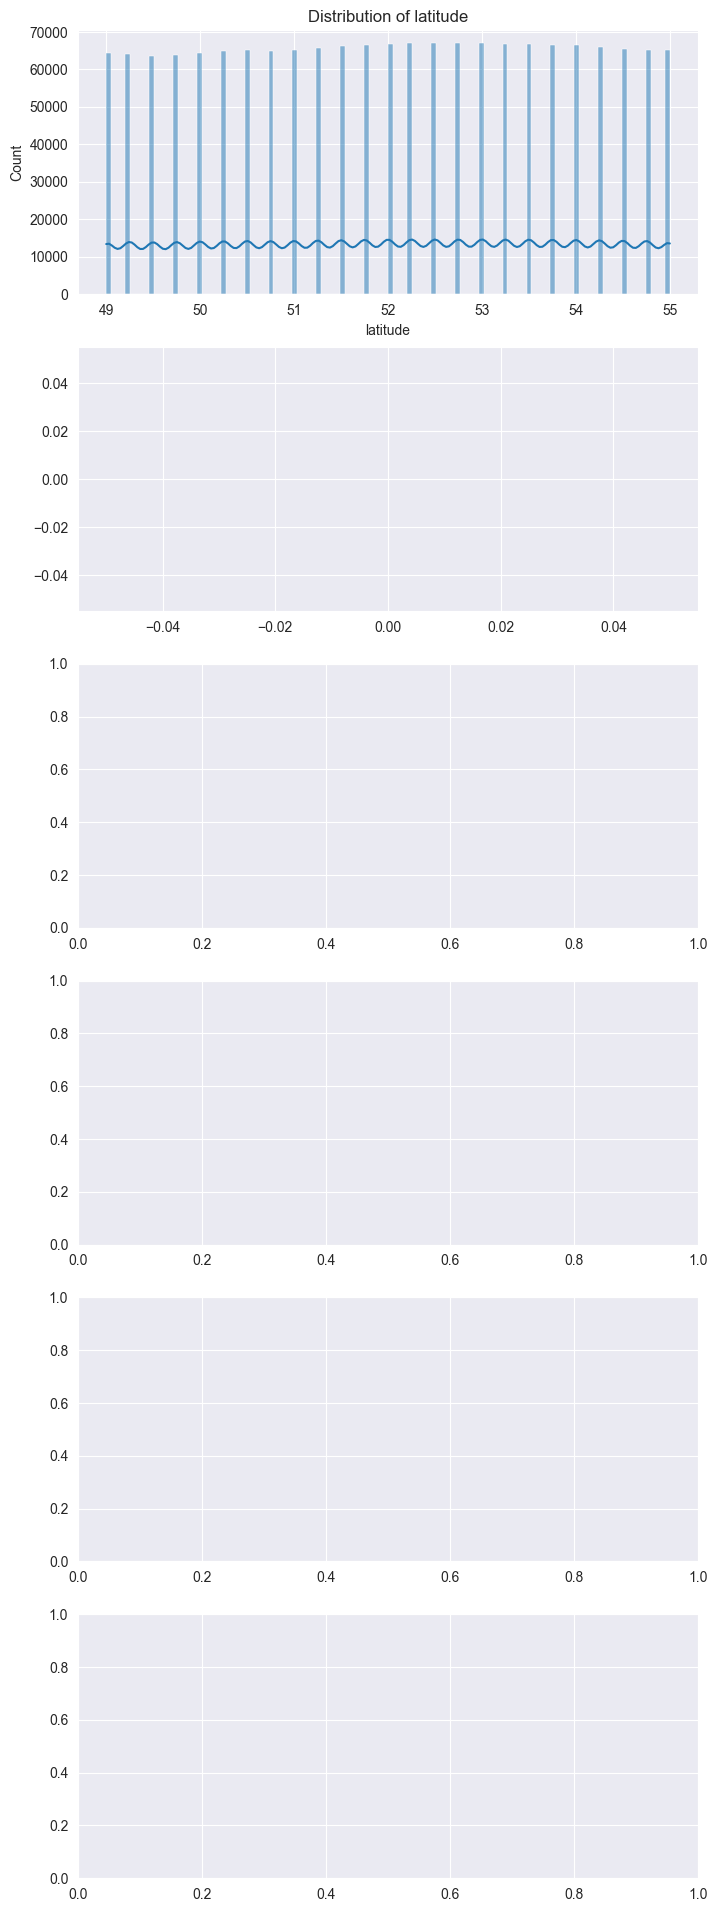

In [14]:
# Plot histograms for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
num_plots = len(numeric_cols)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 4*num_plots))

for ax, col in zip(axes, numeric_cols):
    sns.histplot(df[col].dropna(), ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## Time Series Analysis for Temperature
 

In [ ]:
# Ensure the time column is datetime
if not np.issubdtype(df['time'].dtype, np.datetime64):
    df['time'] = pd.to_datetime(df['time'])

# Plot time series of 2m temperature (t2m)
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['t2m'], marker='.', linestyle='-', alpha=0.5)
plt.title('Time Series of 2m Temperature (t2m)')
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation Analysis
 

In [ ]:
# Compute and display the correlation matrix for numeric variables
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Group ID Conversion and Geospatial Scatter Plot
 

In [ ]:
if 'latitude_numeric' in df.columns and 'longitude_numeric' in df.columns:
    print('Group ID Conversion Sample:')
    print(df[['group_id', 'latitude_numeric', 'longitude_numeric']].dropna().head(10))

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='longitude_numeric', y='latitude_numeric', alpha=0.3)
    plt.title('Scatter Plot of Latitude and Longitude')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
else:
    print('Group ID numeric columns not found.')

In [ ]:
df['date'] = pd.to_datetime(df['time']).dt.date

unique_dates = df['date'].unique()
import random
random_day = random.choice(unique_dates)
print(f"Random day selected: {random_day}")

df_random = df[df['date'] == random_day]

variables_to_plot = ['t2m', 'tp', 'd2m']
for var in variables_to_plot:
    pivot_table = df_random.pivot_table(index='latitude', columns='longitude', values=var, aggfunc='mean')
    
    plt.figure(figsize=(10,8))
    sns.heatmap(pivot_table, cmap='viridis', annot=False)
    plt.title(f"Heatmap of {var} on {random_day}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()